In [1]:
%pip install -qq -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from datasets_tourism import *

> 2024-06-08 14:13:12,925 [info] Project loaded successfully: {'project_name': 'overtourism'}


## Setup dataset

In [14]:
statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])

In [15]:
contamezzi_df.rename(columns={"data": "date"}, inplace=True)
contamezzi_df["date"] = pd.to_datetime(contamezzi_df["date"])
contamezzi_df["day"] = pd.to_datetime(pd.to_datetime(contamezzi_df["date"]).dt.date)
contamezzi_df["hour"] = pd.to_datetime(contamezzi_df["date"]).dt.hour
contamezzi_df = contamezzi_df[
    (contamezzi_df["date"] >= START_DATE) &
    (contamezzi_df["date"] <= END_DATE)
]
contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Contamezzi spiaggia

In [23]:
START_DATE = "2023-07-01"
END_DATE= "2023-07-31"
DRIFT_CORRECTION_FACTOR = 1.075

entrata_lago = contamezzi_df[(contamezzi_df["sensore"] == "M47") & (contamezzi_df["direzione"] == 1) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
entrata_lago = entrata_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_lago = contamezzi_df[(contamezzi_df["sensore"] == "M47") & (contamezzi_df["direzione"] == 2) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
uscita_lago = uscita_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])

differenza_lago = entrata_lago.set_index(['date','day','hour']).subtract(uscita_lago.set_index(['date','day','hour'])*DRIFT_CORRECTION_FACTOR, fill_value=0).reset_index()

cumulativa_lago = differenza_lago.copy()
for c in ['cl1','cl2','cl3','cl4','cl5','cl6','cl7','nonrilevato','total_cars']: 
    cumulativa_lago[c] = cumulativa_lago[c].cumsum()
cumulativa_lago

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,0,5.775,-1.075,0.0,0.000,0.0,0.000,0.00,0.00,4.700
1,2023-07-01 01:00:00,2023-07-01,1,6.550,-1.075,0.0,0.000,0.0,0.000,0.00,0.00,5.475
2,2023-07-01 02:00:00,2023-07-01,2,6.400,-1.075,0.0,0.000,0.0,0.000,0.00,0.00,5.325
3,2023-07-01 03:00:00,2023-07-01,3,6.400,-0.075,0.0,0.000,0.0,0.000,0.00,0.00,6.325
4,2023-07-01 04:00:00,2023-07-01,4,8.400,0.925,0.0,0.000,0.0,0.000,0.00,0.00,9.325
...,...,...,...,...,...,...,...,...,...,...,...,...
716,2023-07-30 20:00:00,2023-07-30,20,-561.500,1026.900,98.6,475.725,459.1,-9.125,-16.95,-1406.80,65.950
717,2023-07-30 21:00:00,2023-07-30,21,-590.225,1025.450,98.6,475.725,459.1,-9.125,-16.95,-1405.80,36.775
718,2023-07-30 22:00:00,2023-07-30,22,-585.700,1027.375,98.6,475.725,459.1,-9.125,-16.95,-1405.95,43.075
719,2023-07-30 23:00:00,2023-07-30,23,-585.900,1027.225,98.6,476.725,459.1,-9.125,-16.95,-1405.95,43.725


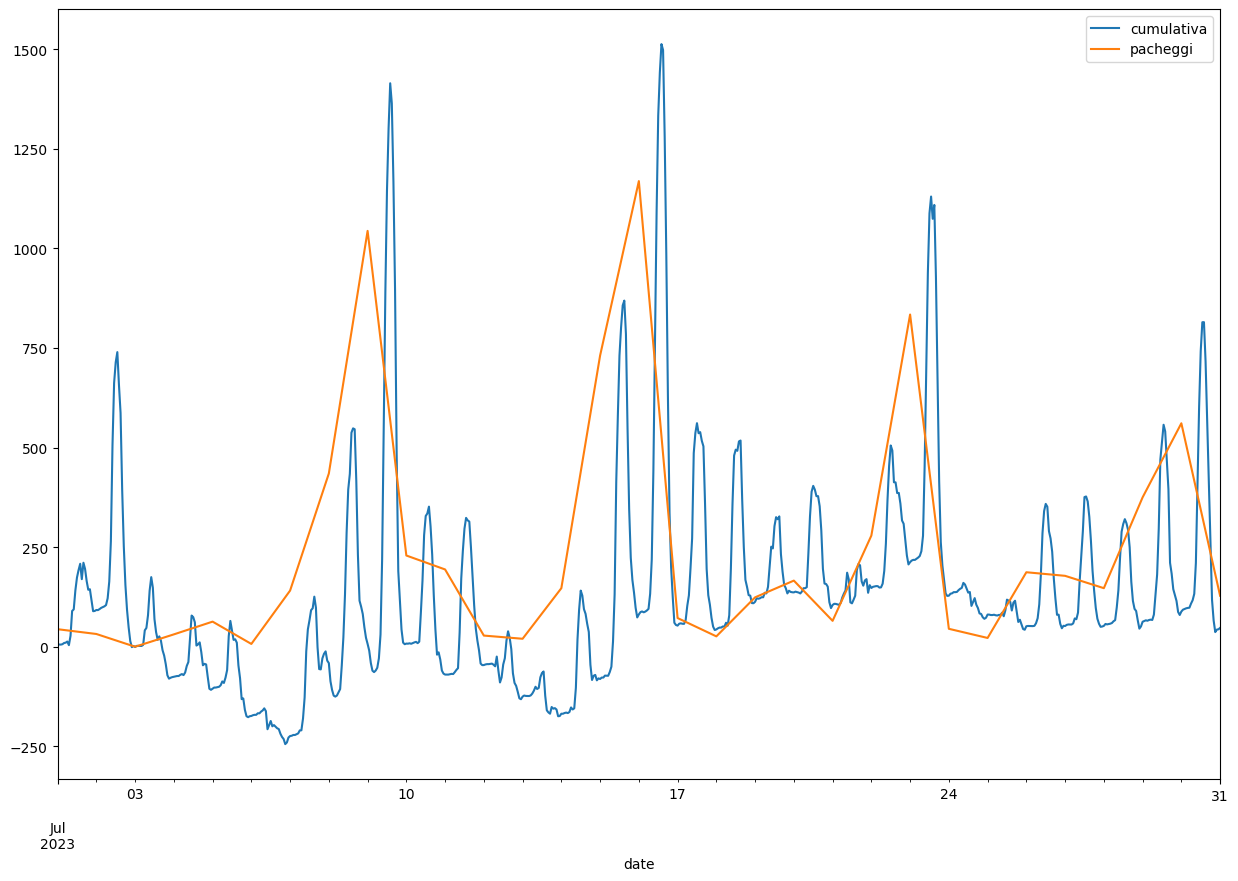

In [24]:
ax = None
#ax = entrata_lago.plot(ax=ax, x="date", y="total_cars", label="entrata", figsize=(15,10))
#ax = uscita_lago.plot(ax=ax, x="date", y="total_cars", label="uscita", figsize=(15,10))
#ax = differenza_lago.plot(ax=ax, x="date", y="total_cars", label="diff", figsize=(15,10))
ax = cumulativa_lago.plot(ax=ax, x="date", y="total_cars", label="cumulativa", figsize=(15,10))

ax = statistiche_parcheggi_molveno_df[(statistiche_parcheggi_molveno_df["date"] >= START_DATE) & (statistiche_parcheggi_molveno_df["date"] <= END_DATE)].plot(ax=ax, x="date", y="TOTALE", label="pacheggi", figsize=(15,10))

## Contamezzi Molveno

In [21]:
START_DATE = "2023-07-01"
END_DATE= "2023-07-31"
DRIFT_CORRECTION_FACTOR = 1.09

entrata_paese_1 = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 1) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
entrata_paese_1 = entrata_paese_1.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_paese_1 = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 2) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
uscita_paese_1 = uscita_paese_1.reset_index().drop(columns=['index','sensore','direzione','comune'])

entrata_paese_2 = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 1) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
entrata_paese_2 = entrata_paese_2.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_paese_2 = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 2) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
uscita_paese_2 = uscita_paese_2.reset_index().drop(columns=['index','sensore','direzione','comune'])

entrata_paese = entrata_paese_1.set_index(['date','day','hour']).add(entrata_paese_2.set_index(['date','day','hour']), fill_value=0).reset_index()
uscita_paese = uscita_paese_1.set_index(['date','day','hour']).add(uscita_paese_2.set_index(['date','day','hour']), fill_value=0).reset_index()

differenza_paese = entrata_paese.set_index(['date','day','hour']).subtract(uscita_paese.set_index(['date','day','hour'])*DRIFT_CORRECTION_FACTOR, fill_value=0).reset_index()

cumulativa_paese = differenza_paese.copy()
for c in ['cl1','cl2','cl3','cl4','cl5','cl6','cl7','nonrilevato','total_cars']: 
    cumulativa_paese[c] = cumulativa_paese[c].cumsum()
cumulativa_paese

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,0,-0.62,3.82,0.00,1.00,0.00,0.00,0.00,0.00,4.20
1,2023-07-01 01:00:00,2023-07-01,1,8.20,2.73,1.00,1.00,0.00,0.00,0.00,1.00,13.93
2,2023-07-01 02:00:00,2023-07-01,2,12.02,1.64,1.00,1.00,0.00,0.00,0.00,1.00,16.66
3,2023-07-01 03:00:00,2023-07-01,3,10.93,1.64,2.00,1.00,0.00,0.00,0.00,1.00,16.57
4,2023-07-01 04:00:00,2023-07-01,4,6.21,4.64,2.00,2.00,0.00,0.00,0.00,1.00,15.85
...,...,...,...,...,...,...,...,...,...,...,...,...
716,2023-07-30 20:00:00,2023-07-30,20,-11542.86,6438.80,2617.86,1458.77,178.94,97.23,-38.96,1144.27,354.05
717,2023-07-30 21:00:00,2023-07-30,21,-11551.60,6438.72,2619.77,1457.59,178.94,99.23,-38.96,1146.27,349.96
718,2023-07-30 22:00:00,2023-07-30,22,-11554.72,6445.91,2622.68,1457.59,180.94,99.23,-38.96,1150.27,362.94
719,2023-07-30 23:00:00,2023-07-30,23,-11560.41,6450.73,2623.68,1458.59,181.85,99.23,-38.96,1152.27,366.98


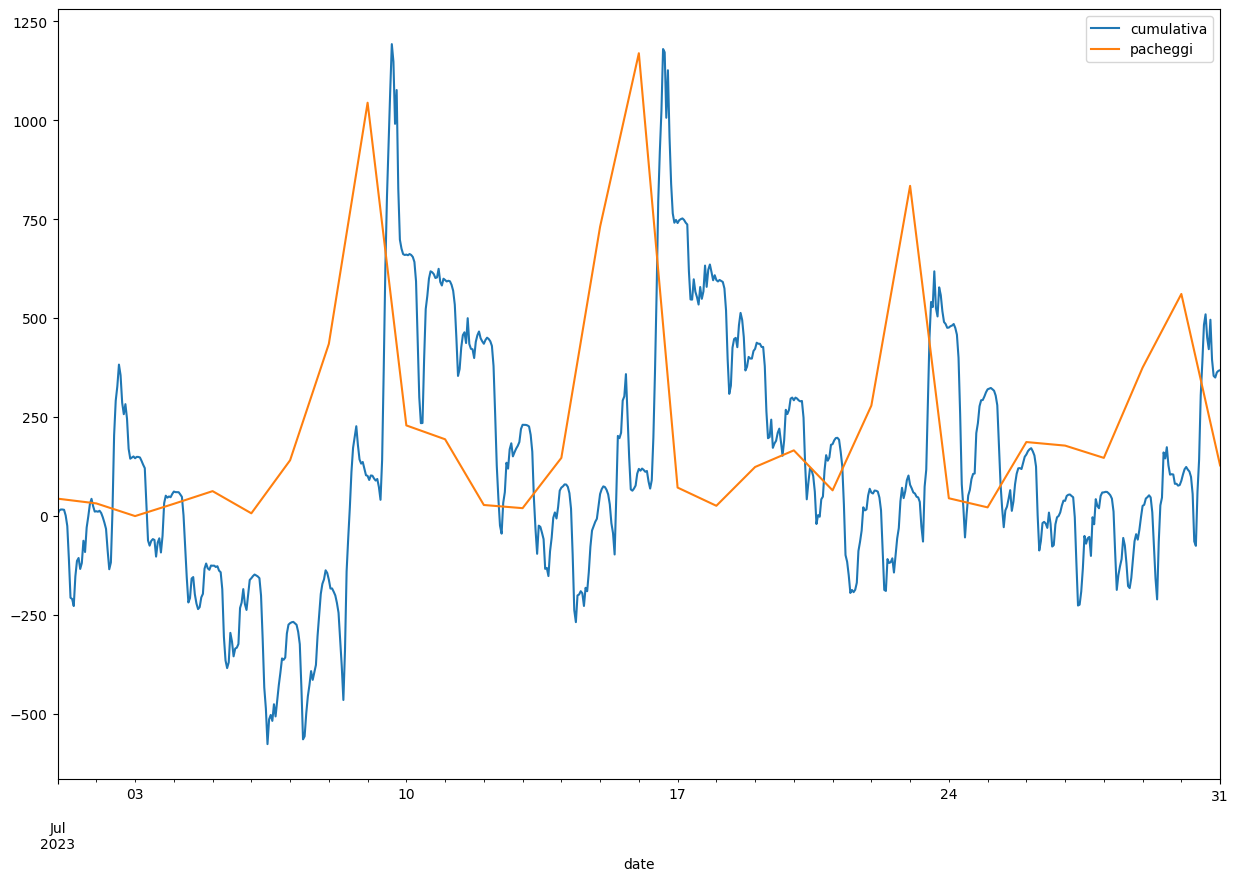

In [22]:
ax = None
#ax = entrata_paese.plot(ax=ax, x="date", y="total_cars", label="entrata", figsize=(15,10))
#ax = uscita_paese.plot(ax=ax, x="date", y="total_cars", label="uscita", figsize=(15,10))
#ax = differenza_paese.plot(ax=ax, x="date", y="total_cars", label="diff", figsize=(15,10))
ax = cumulativa_paese.plot(ax=ax, x="date", y="total_cars", label="cumulativa", figsize=(15,10))

ax = statistiche_parcheggi_molveno_df[(statistiche_parcheggi_molveno_df["date"] >= START_DATE) & (statistiche_parcheggi_molveno_df["date"] <= END_DATE)].plot(ax=ax, x="date", y="TOTALE", label="pacheggi", figsize=(15,10))
